In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
plt.rcParams['axes.unicode_minus']=False    #用来正常显示负号
plt.rcParams['font.sans-serif']=['SimHei']   #防止中文标签乱码

In [3]:
data = pd.read_csv('./data/1.1/data2.csv')
data.head(5)

,ID,品类,商品名,品牌,店铺名,经济体,省份,地级市,原价,快递费,...,累计评价4,信誉4,活动价5,月销量5,累计评价5,信誉5,活动价6,月销量6,累计评价6,信誉6
0,558596846348,蛋,鸽子蛋,亿嘉,ecde08c9e65779b6,中国大陆,湖北,孝感,112.86,0.0,...,69.0,1239.0,69.00,33.0,72.0,1247.0,69.00,20.0,72.0,1260.0
1,531664242111,蛋,其他,other/其他,e25da776fa2f0726,中国大陆,浙江,嘉兴,45.68,0.0,...,257.0,2704.0,45.68,104.0,201.0,2759.0,45.68,94.0,171.0,2800.0
2,576710529109,蛋,鸡蛋,初晓,ccba4eec3fdff6da,中国大陆,安徽,宣城,98.00,0.0,...,1214.0,-1.0,69.80,1346.0,1548.0,-1.0,69.80,1131.0,1825.0,-1.0
3,548104662762,蛋,鸭蛋,百百阳,0e84d4953d5a816a,中国大陆,广西,南宁,118.00,0.0,...,1676.0,-1.0,59.80,549.0,1768.0,-1.0,59.80,451.0,1803.0,-1.0
4,563546480661,蛋,鸟蛋,金必得,e339d3da3c0db9f9,中国大陆,山东,临沂,69.00,0.0,...,6949.0,-1.0,26.90,3960.0,8125.0,-1.0,26.60,2791.0,9086.0,-1.0


In [4]:
#各品类的商品款数
data_tmp = data[['品类','ID']]
data_tmp = data_tmp.groupby('品类',as_index = False).count()

In [5]:
data_tmp

,品类,ID
0,水产,1334
1,水果,1041
2,肉,5182
3,蔬菜,851
4,蛋,1854


Text(0.5, 1.0, '各品类的商品款数')

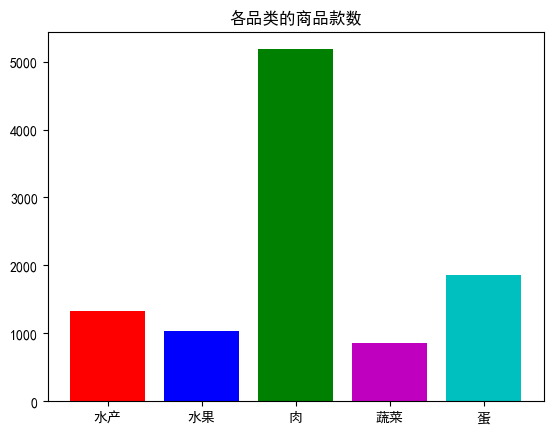

In [6]:
plt.bar(data_tmp['品类'],data_tmp['ID'], color = ['r','b','g','m','c'] )
plt.title('各品类的商品款数')

In [7]:
#各品类的店铺数
data['平均信誉'] = (data['信誉1']+data['信誉2']+data['信誉3']+data['信誉4']+data['信誉5']+data['信誉6'])/6
data['是否皇冠'] = 0
data.是否皇冠[data['平均信誉']>=10001] = 1

data_tmp = data[['品类','店铺名','是否天猫','是否皇冠']]
data_tmp.drop_duplicates(inplace=True)
data_tmp.reset_index(drop=True,inplace = True)
data_tmp1 = data_tmp[['品类','店铺名']].groupby('品类',as_index = False).count()

C:\Users\lb\AppData\Local\Temp\ipykernel_6464\1228456995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.是否皇冠[data['平均信誉']>=10001] = 1
C:\Users\lb\AppData\Local\Temp\ipykernel_6464\1228456995.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tmp.drop_duplicates(inplace=True)


In [8]:
data_tmp1

,品类,店铺名
0,水产,485
1,水果,449
2,肉,2491
3,蔬菜,427
4,蛋,828


Text(0.5, 1.0, '各品类的店铺家数')

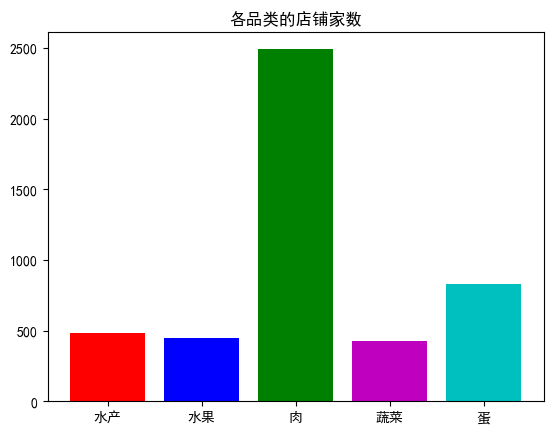

In [9]:
plt.bar(data_tmp1['品类'],data_tmp1['店铺名'], color = ['r','b','g','m','c'] )
plt.title('各品类的店铺家数')

In [10]:
data_tmp2 = data_tmp[['品类','是否天猫']].groupby('品类',as_index = False).sum()

In [11]:
data_tmp2

,品类,是否天猫
0,水产,204
1,水果,272
2,肉,623
3,蔬菜,123
4,蛋,246


In [12]:
data_tmp2['天猫占比'] = data_tmp2['是否天猫']/data_tmp1['店铺名']

In [13]:
data_tmp2

,品类,是否天猫,天猫占比
0,水产,204,0.420619
1,水果,272,0.605791
2,肉,623,0.250100
3,蔬菜,123,0.288056
4,蛋,246,0.297101


Text(0.5, 1.0, '各品类的店铺类型')

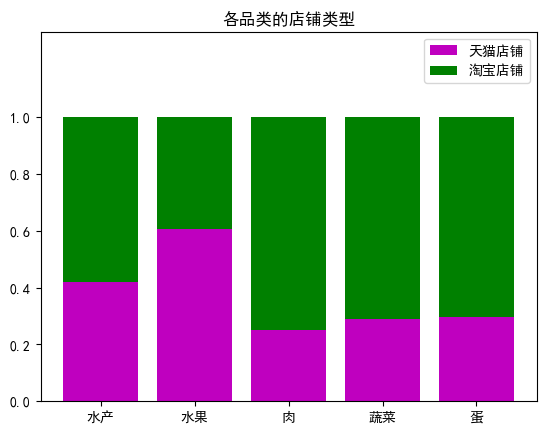

In [14]:
plt.ylim((0,1.3))
plt.yticks([0,0.2,0.4,0.6,0.8,1])
data_tmp2['淘宝占比'] = 1-data_tmp2['天猫占比']
plt.bar(data_tmp2['品类'],data_tmp2['天猫占比'], color = ['m'] )
plt.bar(data_tmp2['品类'],data_tmp2['淘宝占比'], bottom= data_tmp2['天猫占比'],color = ['g'] )
plt.legend(['天猫店铺','淘宝店铺'])
plt.title('各品类的店铺类型')

In [15]:
#各品类的淘宝皇冠店铺占比
data_tmp3 = data_tmp[['品类','是否皇冠']].groupby('品类',as_index = False).sum()

In [16]:
data_tmp3

,品类,是否皇冠
0,水产,116
1,水果,91
2,肉,1313
3,蔬菜,140
4,蛋,260


In [17]:
data_tmp3['皇冠占比'] = data_tmp3['是否皇冠']/data_tmp1['店铺名']

In [18]:
data_tmp3

,品类,是否皇冠,皇冠占比
0,水产,116,0.239175
1,水果,91,0.202673
2,肉,1313,0.527098
3,蔬菜,140,0.327869
4,蛋,260,0.314010


In [19]:
data_tmp2['皇冠占比'] = data_tmp3['皇冠占比'] 
data_tmp2['淘宝普通店占比'] = 1 - data_tmp2['天猫占比'] - data_tmp2['皇冠占比'] 
data_tmp2

,品类,是否天猫,天猫占比,淘宝占比,皇冠占比,淘宝普通店占比
0,水产,204,0.420619,0.579381,0.239175,0.340206
1,水果,272,0.605791,0.394209,0.202673,0.191537
2,肉,623,0.250100,0.749900,0.527098,0.222802
3,蔬菜,123,0.288056,0.711944,0.327869,0.384075
4,蛋,246,0.297101,0.702899,0.314010,0.388889


Text(0.5, 1.0, '各品类的店铺类型')

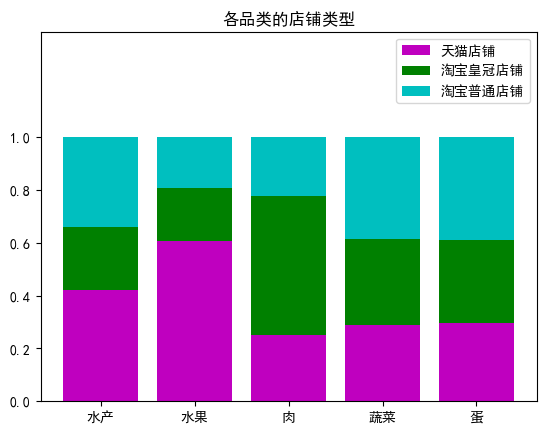

In [20]:
plt.ylim((0,1.4))
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.bar(data_tmp2['品类'],data_tmp2['天猫占比'], color = ['m'] )
plt.bar(data_tmp2['品类'],data_tmp2['皇冠占比'], bottom= data_tmp2['天猫占比'],color = ['g'] )
plt.bar(data_tmp2['品类'],data_tmp2['淘宝普通店占比'], bottom= data_tmp2['天猫占比']+data_tmp2['皇冠占比'],color = ['c'] )
plt.legend(['天猫店铺','淘宝皇冠店铺','淘宝普通店铺'])
plt.title('各品类的店铺类型')

In [21]:
data['半年销量'] = data['月销量1']+data['月销量2']+data['月销量3']+data['月销量4']+data['月销量5']+data['月销量6']
data['半年销售额'] = data['月销量1']*data['活动价1']+data['月销量2']*data['活动价2']+data['月销量3']*data['活动价3'] \
                     +data['月销量4']*data['活动价4']+data['月销量5']*data['活动价5']+data['月销量6']*data['活动价6']
data['客单价'] = data['半年销售额']/data['半年销量']

In [22]:
data_tmp = data[['品类','客单价']]

In [23]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10262 entries, 0 to 10261
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   品类      10262 non-null  object 
 1   客单价     10174 non-null  float64
dtypes: float64(1), object(1)
memory usage: 160.5+ KB


In [24]:
data_tmp.dropna(inplace = True)

C:\Users\lb\AppData\Local\Temp\ipykernel_6464\2278731034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tmp.dropna(inplace = True)


In [25]:
data_tmp = data_tmp[['品类','客单价']].groupby('品类',as_index = False).mean()

In [26]:
data_tmp

,品类,客单价
0,水产,112.924025
1,水果,70.143394
2,肉,54.479974
3,蔬菜,54.746936
4,蛋,63.055770


In [27]:
#各地销售情况
data_tmp = data[['省份','品类','半年销量']]
data_tmp = data_tmp.groupby(by = ['品类','省份'],as_index = False).sum()

In [28]:
data_tmp1 = data_tmp[data_tmp['品类']=='水产'].sort_values(by=['半年销量'],ascending = False)

In [29]:
data_tmp2 = data_tmp[data_tmp['品类']=='水果'].sort_values(by=['半年销量'],ascending = False)

In [30]:
data_tmp3 = data_tmp[data_tmp['品类']=='肉'].sort_values(by=['半年销量'],ascending = False)

In [31]:
data_tmp4 = data_tmp[data_tmp['品类']=='蔬菜'].sort_values(by=['半年销量'],ascending = False)

In [32]:
data_tmp5 = data_tmp[data_tmp['品类']=='蛋'].sort_values(by=['半年销量'],ascending = False)

In [33]:
data_tmp1.reset_index(drop = True, inplace = True)
s = 0
for i in range(10,len(data_tmp1)):
    s = s+data_tmp1['半年销量'][i]
t = data_tmp1.半年销量[data_tmp1.省份=='其他']
data_tmp1.半年销量[data_tmp1.省份=='其他'] = t+s
data_tmp1.drop(labels=range(10,len(data_tmp1)),axis=0, inplace=True)
data_tmp1

C:\Users\lb\AppData\Local\Temp\ipykernel_6464\714968236.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tmp1.半年销量[data_tmp1.省份=='其他'] = t+s


,品类,省份,半年销量
0,水产,山东,1278465.0
1,水产,非中国大陆,858956.0
2,水产,福建,171929.0
3,水产,江苏,145065.0
4,水产,广东,121519.0
5,水产,浙江,63373.0
6,水产,辽宁,58073.0
7,水产,广西,21369.0
8,水产,湖南,20529.0
9,水产,河北,4338.0


Text(0.5, 1.0, '水产品类Top9省份')

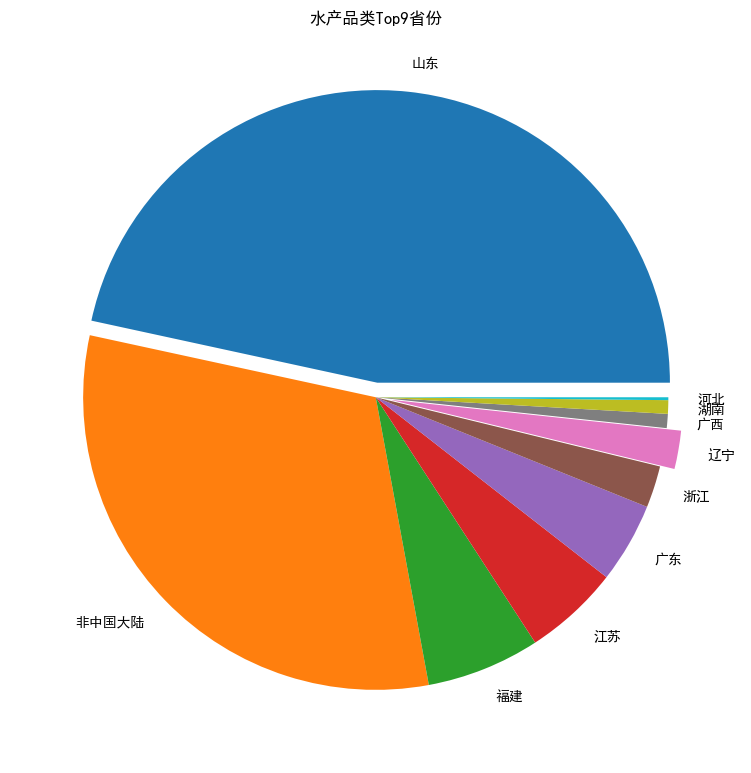

In [34]:
plt.figure(figsize=(9.5,9.5))## 将画布设定为正方形，则绘制的饼图是正圆
explode=[0.05, 0,0,0,0,0,0.05,0,0,0]
plt.pie(data_tmp1['半年销量'],explode = explode,labels = data_tmp1['省份'])
plt.title('水产品类Top9省份')

In [35]:
data_tmp2.reset_index(drop = True, inplace = True)
data_tmp2

,品类,省份,半年销量
0,水果,广西,5534491.0
1,水果,江苏,4283324.0
2,水果,四川,4174821.0
3,水果,山西,2798776.0
4,水果,非中国大陆,2561250.0
5,水果,云南,2452862.0
6,水果,湖南,2382166.0
7,水果,江西,1663799.0
8,水果,新疆,1513459.0
9,水果,海南,1371302.0


In [36]:
s = 0
for i in range(9,len(data_tmp2)):
    s = s+data_tmp2['半年销量'][i]
data_tmp2.drop(labels=range(9,len(data_tmp2)),axis=0, inplace=True)

In [37]:
data_tmp2 = data_tmp2.append({'品类':'水果','省份':'其他','半年销量':s},ignore_index=True)

C:\Users\lb\AppData\Local\Temp\ipykernel_6464\2033839287.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_tmp2 = data_tmp2.append({'品类':'水果','省份':'其他','半年销量':s},ignore_index=True)


In [38]:
data_tmp2

,品类,省份,半年销量
0,水果,广西,5534491.0
1,水果,江苏,4283324.0
2,水果,四川,4174821.0
3,水果,山西,2798776.0
4,水果,非中国大陆,2561250.0
5,水果,云南,2452862.0
6,水果,湖南,2382166.0
7,水果,江西,1663799.0
8,水果,新疆,1513459.0
9,水果,其他,4566990.0


Text(0.5, 1.0, '水果品类Top9省份')

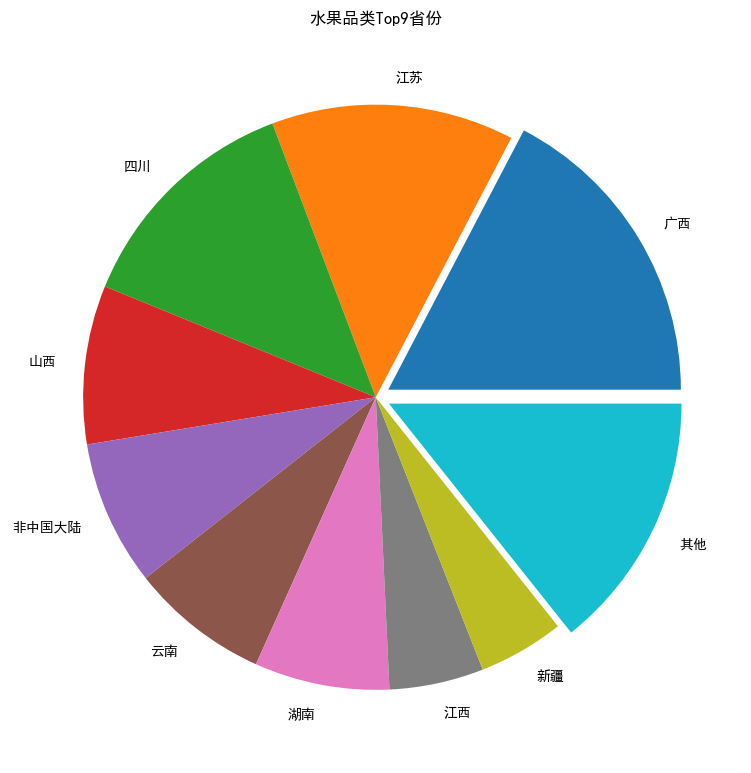

In [39]:
plt.figure(figsize=(9.5,9.5))## 将画布设定为正方形，则绘制的饼图是正圆
explode=[0.05, 0,0,0,0,0,0,0,0,0.05]
plt.pie(data_tmp2['半年销量'],explode = explode,labels = data_tmp2['省份'])
plt.title('水果品类Top9省份')

In [40]:
data.to_csv('./data/1.1/data2.csv',header=True,index=False)